In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # устанавливаем seaborn как по-умолчанию для отрисовки графиков

# Анализ Датасета и Выделение признаков

In [36]:
ds = pd.read_excel("/content/anime_dataset.xlsx")
ds.head(10)

,id_anime,anime_name,anime_score,studioname,genre,themes,demographic,rating,index
0,351,Ojamajo Doremi Sharp,7.42,Toei Animation,Comedy,Childcare,Shoujo,G - All Ages,1
1,783,Miami Guns,6.50,Group TAC,"Comedy, Ecchi",Detective,Shounen,R - 17+ (violence & profanity),2
2,4962,Rokumon Tengai Mon Colle Knights,6.53,Studio Deen,"Adventure, Comedy, Fantasy",Parody,Kids,G - All Ages,3
3,481,Yuв†Giв†Oh! Duel Monsters,7.47,Gallop,"Action, Adventure, Fantasy",Strategy Game,Shounen,PG-13 - Teens 13 or older,4
4,189,Love Hina,7.10,Xebec,"Comedy, Romance, Ecchi",Harem,Shounen,PG-13 - Teens 13 or older,5
5,1313,Digimon Adventure 02,7.23,Toei Animation,"Action, Adventure, Comedy, Drama, Fantasy",Isekai,Kids,PG - Children,6
6,104,Ayashi no Ceres,7.19,Pierrot,"Adventure, Drama, Horror, Romance, Supernatura...","Psychological, Reincarnation",Shoujo,R - 17+ (violence & profanity),7
7,129,Gensoumaden Saiyuuki,7.55,Pierrot,"Action, Adventure, Comedy, Drama, Supernatural",Mythology,Shounen,R - 17+ (violence & profanity),8
8,233,Daa! Daa! Daa!,7.66,J.C.Staff,"Comedy, Sci-Fi",Childcare,Shoujo,G - All Ages,9
9,2694,Hidamari no Ki,7.16,Madhouse,"Action, Award Winning, Drama","Historical, Medical, Samurai",Seinen,R+ - Mild Nudity,10


In [37]:
# number of rows and columns in the data frame

ds.shape

(951, 9)

In [38]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_anime     951 non-null    int64  
 1   anime_name   951 non-null    object 
 2   anime_score  951 non-null    float64
 3   studioname   951 non-null    object 
 4   genre        951 non-null    object 
 5   themes       951 non-null    object 
 6   demographic  951 non-null    object 
 7   rating       951 non-null    object 
 8   index        951 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 67.0+ KB


Посмотрим какие жанры и теги наиболее популярны.

In [39]:
ds['genre'] = ds['genre'].astype('str')
ds['themes'] = ds['themes'].astype('str')

In [40]:
title_corpus = ' '.join(ds['genre'])
themes_corpus = ' '.join(ds['themes'])
res = title_corpus + themes_corpus

In [41]:
from wordcloud import WordCloud, STOPWORDS

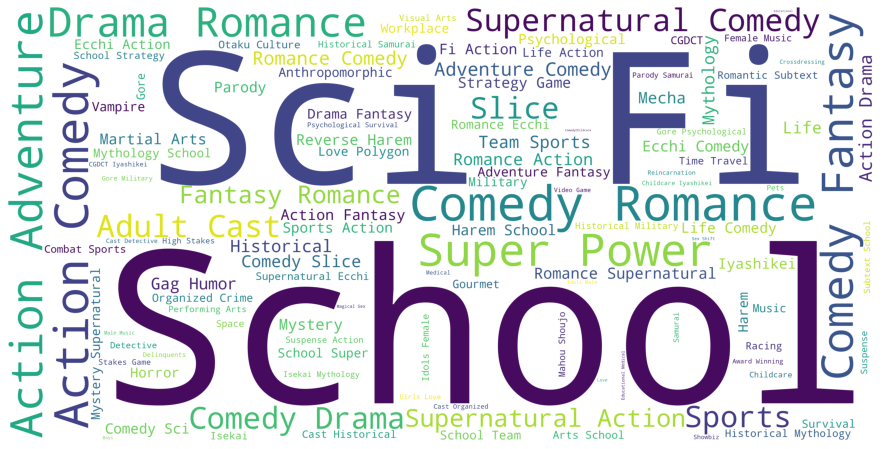

In [42]:
keywords_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(res)
plt.figure(figsize=(16,8))
plt.imshow(keywords_wordcloud)
plt.axis('off')
plt.show()

Самые популярные жанры - школа, научная фантастика, экшен, комедия и романтика. Самый популярный тег - суперсилы.

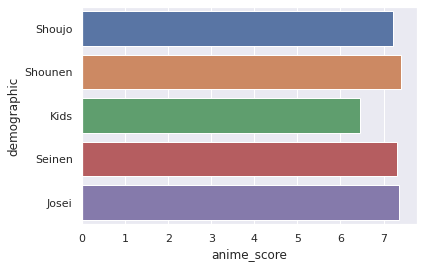

In [43]:
sns.barplot(x='anime_score', y='demographic', data=ds, ci=None)

Чаще всего высокие оценки у сёнонов (аниме, рассчитанные на юношей до 18-ти лет), но в целом результаты почти одинаковые.

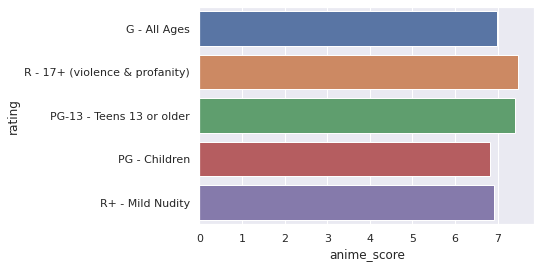

In [44]:
sns.barplot(x='anime_score', y='rating', data=ds, ci=None)

Высокие оценки имеют аниме с рейтингами R-17 и PG-13, то есть большинство аниме рассчитано на подростков от 13 до 17 лет.

demographic                     Josei  Kids  Seinen  Shoujo  Shounen
rating                                                              
G - All Ages                        1    23       8       8       14
PG - Children                       2    20       1      34        9
PG-13 - Teens 13 or older          33     1     148      92      320
R - 17+ (violence & profanity)      7     0      73       5       78
R+ - Mild Nudity                    0     0      41       3       30


Text(0, 0.5, 'Percentage')

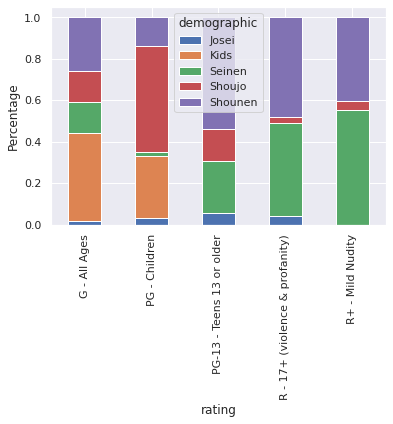

In [45]:
tab = pd.crosstab(ds['rating'], ds['demographic'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('rating')
plt.ylabel('Percentage')

Аниме для детей имеют возрастной рейтинг для всех или для детей (до 13). Сёдзе (произведение для девушек до 18 лет) чаще всего имеет рейтинг для детей. Чем выше возрастное ограничение, тем увеличивается процент содержания сёнонов и сейненов (произведение для юношей до 18 и старше соотвественно)

Выделим релевантные параметры для рекомендаций.

In [46]:
# selecting the relevant features for recommendation

selected_features = ['genre','themes','demographic','rating','studioname']
print(selected_features)

['genre', 'themes', 'demographic', 'rating', 'studioname']


In [47]:
# combining all the 5 selected features

combined_features = ds['genre']+' '+ ds['themes'] + ' ' + ds['demographic']+ ' '+ ds['rating']+' '+ ds['studioname']

In [48]:
print(combined_features)

0      Comedy Childcare Shoujo G - All Ages Toei Anim...
1      Comedy, Ecchi Detective Shounen R - 17+ (viole...
2      Adventure, Comedy, Fantasy Parody Kids G - All...
3      Action, Adventure, Fantasy Strategy Game Shoun...
4      Comedy, Romance, Ecchi Harem Shounen PG-13 - T...
                             ...                        
946    Comedy, Supernatural Gag Humor, School, Super ...
947    Action, Adventure, Drama, Fantasy, Horror Gore...
948    Slice of Life, Supernatural Historical, Mythol...
949    Sports Racing Shounen PG-13 - Teens 13 or olde...
950    Comedy Anthropomorphic Kids G - All Ages UchuP...
Length: 951, dtype: object


# Рекомендательная система

**Movie Description Based Recommender**

In [49]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Показатель TF-IDF оценивает значимость слова в документе, на основе данных о всей коллекции документов. Данная мера определяет вес слова за величину пропорциональную частоте его вхождения в документ и обратно пропорциональную частоте его вхождения во всех документах коллекции. То есть преобразуем нашу информацию о значимых параметров в вектора, и будем искать коррелирующие произведения (на основе ключевых слов и их частоты вхождения)

In [50]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [51]:
feature_vectors = vectorizer.fit_transform(combined_features)
feature_vectors.shape

(951, 294)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

Для меры сходства (Cosine similarity) выберем linear kernel (ядра являются мерами сходства, т.е. s(a, b) > s(a, c), если объекты a и b считаются "более похожими", чем объекты a и c), так как оно быстрее.

In [53]:
cosine_sim = linear_kernel(feature_vectors, feature_vectors)

In [54]:
cosine_sim

array([[1.        , 0.02589967, 0.31320027, ..., 0.        , 0.        ,
        0.29416674],
       [0.02589967, 1.        , 0.02530584, ..., 0.        , 0.02803203,
        0.02376798],
       [0.31320027, 0.02530584, 1.        , ..., 0.        , 0.        ,
        0.4289728 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.1456258 ,
        0.        ],
       [0.        , 0.02803203, 0.        , ..., 0.1456258 , 1.        ,
        0.        ],
       [0.29416674, 0.02376798, 0.4289728 , ..., 0.        , 0.        ,
        1.        ]])

Теперь у нас есть матрица парного косинусного сходства (cosine similarity) для всех фильмов в нашем наборе данных. Следующим шагом будет написание функции, которая возвращает 30 наиболее похожих фильмов на основе оценки косинусного сходства.

In [55]:
smd = ds.reset_index()
titles = smd['anime_name']
indices = pd.Series(smd.index, index=smd['anime_name'])

In [56]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [57]:
# creating a list with all the anime names given in the dataset

list_of_all_titles = ds['anime_name'].tolist()
print(list_of_all_titles)

['Ojamajo Doremi Sharp', 'Miami Guns', 'Rokumon Tengai Mon Colle Knights', 'Yuв\x98†Giв\x98†Oh! Duel Monsters', 'Love Hina', 'Digimon Adventure 02', 'Ayashi no Ceres', 'Gensoumaden Saiyuuki', 'Daa! Daa! Daa!', 'Hidamari no Ki', 'Tottoko Hamtarou', 'InuYasha', 'Hajime no Ippo', 'Gravitation', 'Yami no Matsuei', 'Jinzou Ningen Kikaider The Animation', 'Shin Megami Tensei Devil Children', 'Baby Felix', 'Grappler Baki (TV)', 'Salaryman Kintarou', 'Hakaima Sadamitsu', 'Pi Po Pa Po Patrol-kun', 'Shin Shirayuki-hime Densetsu PrГ©tear', 'Jungle wa Itsumo Hare nochi Guu', 'Hanaukyou Maid-tai', 'Project ARMS', 'Koutetsu Tenshi Kurumi 2', 'Taiho Shichau zo: Second Season', 'Dr. Rin ni Kiitemite!', 'Dennou Boukenki Webdiver', 'Fruits Basket', 'Shaman King', 'Grappler Baki: Saidai Tournament-hen', 'Hellsing', 'Tennis no Ouji-sama', 'Hikaru no Go', 'X', 'Mahoromatic: Automatic Maiden', 'Captain Tsubasa: Road to 2002', 'Cyborg 009: The Cyborg Soldier', 'Project ARMS: The 2nd Chapter', 'Kinnikuman II 

# Результат

In [58]:
# getting the anime name from the user

anime_name = input(' Enter your favourite anime name : ')

 Enter your favourite anime name : vinland


In [59]:
# finding the close match for the anime name given by the user

find_close_match = difflib.get_close_matches(anime_name, list_of_all_titles)
print(find_close_match)

['Vinland Saga']


In [60]:
close_match = find_close_match[0]
print(close_match)

Vinland Saga


Теперь сравним полученный список рекомендаций с рекомендациями на популярных сайтах (на примере аниме "Vinland Saga")

In [61]:
get_recommendations(close_match).head(20)

740           Shingeki no Kyojin Season 3
776    Shingeki no Kyojin Season 3 Part 2
663           Shingeki no Kyojin Season 2
557                       Owari no Seraph
587    Owari no Seraph: Nagoya Kessen-hen
461                    Shingeki no Kyojin
669                    Berserk 2nd Season
690                            Inuyashiki
133                           Samurai Gun
721                          Golden Kamuy
758               Golden Kamuy 2nd Season
859               Golden Kamuy 3rd Season
704             Koi wa Ameagari no You ni
333                              Hakuouki
357                Hakuouki: Hekketsuroku
430                  Hakuouki: Reimeiroku
935                          Chainsaw Man
824                            Dorohedoro
142           Basilisk: Kouga Ninpou Chou
427                               Kingdom
Name: anime_name, dtype: object

Самый популярный сайт на западе (MAL): Shingeki no Kyojin, Dororo, Kenpuu Denki Berserk, 91 Days, Golden Kamuy, Kingdom, 	
Arslan Senki, Shingeki no Kyojin: The Final Season, 	
Mushoku Tensei, Youjo Senki... - совпадает более чем на 70% с полученными результатами. Некоторые произведения не вошли, так как у них не были заполнены некоторые параметры или они вышли раньше 2000-х.
Сайт, где рекомендации основываются полностью на отзывах пользователей (AnimePlanet): Shingeki no Kyojin, Berserk, Dororo, One Piece, Arslan Senki, Shoukoku no Altair, Akatsuki no Yona, Shingeki no Kyojin 3, Jormungand, Kingdom, Shigurui, Golden Kamuy 2, 91 Days, Kiseijuu... - похожие результаты как и выше.
Можно сделать вывод, что система рекомендаций довольно хорошо работает - она показывает результаты, наиболее похожие на введенное аниме.

Одна из особенностей построенной системы рекомендаций заключается в том, что она рекомендует фильмы независимо от рейтингов и популярности. 

Поэтому добавим механизм, где также учитывается рейтинг рекомендуемых произведений.


In [62]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['anime_name', 'anime_score']]
    qualified = movies.sort_values(by="anime_score",ascending=False,axis=0).head(20)
    return qualified

In [63]:
improved_recommendations(close_match)

,anime_name,anime_score
776,Shingeki no Kyojin Season 3 Part 2,9.06
860,Shingeki no Kyojin: The Final Season,8.81
843,Kingdom 3rd Season,8.81
930,Kingdom 4th Season,8.76
935,Chainsaw Man,8.68
740,Shingeki no Kyojin Season 3,8.62
461,Shingeki no Kyojin,8.53
663,Shingeki no Kyojin Season 2,8.50
859,Golden Kamuy 3rd Season,8.45
480,Kingdom 2nd Season,8.33


Content Based Recommender:  по сути объединили две системы, основанные на контенте: одна принимала на вход демографический параметр и возрастный рейтинг, а другая - метаданные, такие как студия, жанр и темы для составления прогнозов. А также разработали простой фильтр, чтобы отдать предпочтение фильмам с высоким рейтингом.